## Using TensorFlow to implement the linear regression algorithm

In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

In [32]:
learning_rate = 0.01
training_iterations = 1000
display_step = 50

## Random training data

In [33]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [34]:
X = tf.placeholder('float')
Y = tf.placeholder('float')

W = tf.Variable(rng.randn(), name = 'weight')
b = tf.Variable(rng.randn(), name = 'bias')

In [35]:
pred = tf.add(tf.multiply(X,W), b)

In [36]:
# mean squared error

cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

# gradient descent

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [37]:
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.000241475 W= 0.338949 b= 0.158647
Epoch: 0100 cost= 0.000139433 W= 0.333635 b= 0.196879
Epoch: 0150 cost= 0.000068870 W= 0.328637 b= 0.232837
Epoch: 0200 cost= 0.000024982 W= 0.323936 b= 0.266656
Epoch: 0250 cost= 0.000003587 W= 0.319514 b= 0.298464
Epoch: 0300 cost= 0.000001052 W= 0.315356 b= 0.32838
Epoch: 0350 cost= 0.000014227 W= 0.311444 b= 0.356516
Epoch: 0400 cost= 0.000040382 W= 0.307766 b= 0.38298
Epoch: 0450 cost= 0.000077155 W= 0.304306 b= 0.40787
Epoch: 0500 cost= 0.000122511 W= 0.301052 b= 0.431278
Epoch: 0550 cost= 0.000174695 W= 0.297991 b= 0.453296
Epoch: 0600 cost= 0.000232205 W= 0.295113 b= 0.474003
Epoch: 0650 cost= 0.000293748 W= 0.292406 b= 0.493479
Epoch: 0700 cost= 0.000358218 W= 0.28986 b= 0.511796
Epoch: 0750 cost= 0.000424690 W= 0.287465 b= 0.529023
Epoch: 0800 cost= 0.000492374 W= 0.285212 b= 0.545227
Epoch: 0850 cost= 0.000560592 W= 0.283094 b= 0.560467
Epoch: 0900 cost= 0.000628797 W= 0.281101 b= 0.574802
Epoch: 0950 cost= 0.000696515 W=

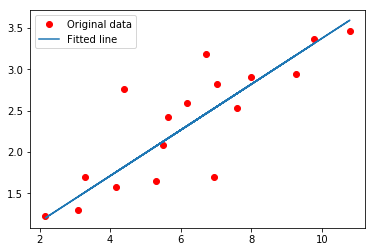

In [38]:
# Running TF sessions to find output of (xW + b) and plotting to compare

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_iterations):
        for (x,y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict = {X:x, Y:y})
    
        if (epoch + 1) % display_step == 0:
            c = sess.run(cost, feed_dict = {X:x, Y:y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
                
    print ("optimization complete")
    training_cost = sess.run(cost, feed_dict = {X: train_X, Y: train_Y})
    print ("Training cost = ", training_cost, "W=", sess.run(W), "b=", sess.run(b))
    
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
